<font size="3">KINGDOM OF SAUDI ARABIA<br>
Ministry of Higher Education<br>                                  
Al-Imam Mohammad University<br>
College of Computer & Information Sciences<br><br>
    
 
**Optimization and Metaheuristics (CS467 ), Spring 2023**
<br>**Instructor:
Dr. Wojdan BinSaeedan**
<br><br>
**Prepared by:**<br>
- Alhanouf Almansour (440019183)<br>
- Khloud Alnufaie (440020617)<br>
- Raghad Albosais (440020209)<br>
- Weaam Alghaith (440023306)<br>


**Section: 371**

# 1.	Introduction


Deepfake is a newly emerged issue in our modern days which is media of a person in which their face or body has been digitally altered so that they appear to be someone else, typically used maliciously or to spread false information. In this project, we aim to enhance deepfake videos detection method based on Convolutional Neural Networks (CNNs) by using Jaya optimization algorithm. 
<br><br>
   1.1. Problem statement<br>
<font size="3">
One of the strong techniques used in creating misinformation has become known recently as "Deepfake". Deepfakes increasingly threaten the privacy of individuals. Furthermore, Deepfakes can distort our perception of the truth and deceive us. The content of a video can shake the world either because it sparks controversy, or discredits someone. An individual may be accused or suspected of a situation that did not actually occur. For example, modifying a person’s expression to appear sad when in reality, they were happy to satisfy a fake narrative.
<br><br>

 1.2. Problem formulation<br>
<font size="3">
- Task (T)	Classify an Video to a real or a fake depend on it is manipulated or not.<br>
- Experience (E)	A collection of real and fake faces vidos.<br>
- Performance (P)	Classification evaluation metric, which are accuracy, recall, precision and F1.

1.3. Dataset<br>
We plan to detect fake videos by using Celeb-DF (v2). Celeb-DF (v2) is a large-scale challenging dataset for deepfake forensics. It includes 890 real MP4 videos and 5639 fake MP4 videos, total of 9 GB. The average length of all videos is approximate 13 seconds with the standard frame rate of 30 frame-per-second. The real videos are collected from YouTube with subjects of different ages, ethnic groups, and genders. The fake videos are generated by swapping faces. 
Dataset available : https://github.com/yuezunli/celeb-deepfakeforensics 
<br> <br>
 1.4. Model architecture<br>
<font size="3">
<br>
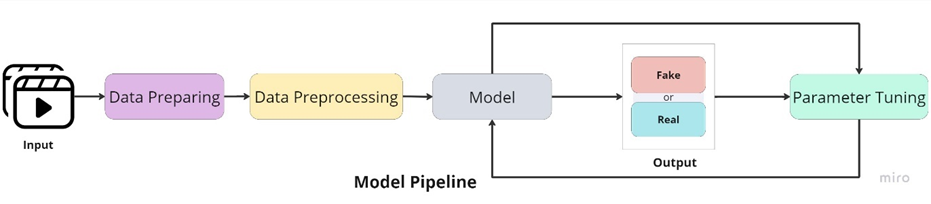
<br>
The overall model architecture that follows the step of implementation is illustrated in figure 1. We describing and explain our approach to tackling the CNN model by following the approach applied in this paper “Novel Convolutional Neural Networks based Jaya algorithm Approach for Accurate Deepfake Video Detection”. We used their proposed method regarding the hyperparameter tuning of CNN using Jaya optimization algorithm. 

# 2.	Import resources

In [ ]:
#os :module to provides functions for dealing with folder 
import os
#math :module that provides standard mathematical constants and functions.
import math
#random:module to work with random data generation
import random
#pd :package used for data analysis and manipulation tool
import pandas as pd
#module :to import name for opencv-python  library to solve computer vision problems
import cv2
#tensorflow :library for machine learning and artificial intelligence.
import tensorflow as tf
#train_test_split : splitting dataset into two subsets: for training data and for testing data.
from sklearn.model_selection import train_test_split
#NumPy :is a Python library used for convert list to arrays
import numpy as np
#argparse :module’s support for command-line interfaces
import argparse
#exists :method in Python is used to check whether the specified path exists or not. 
from os.path import exists
#makedirs :method in Python is used to create a directory recursively.
from os import makedirs
#sns :library for data visualization
import seaborn as sns
#plt :module to import name for opencv-python  library to solve computer vision problems.
import matplotlib.pyplot as plt 
#warnings :module was introduced in PEP 230 as a way to warn programmers 
import warnings
warnings.filterwarnings('ignore')
#shuffle : takes a sequence, like a list, and reorganize the order of the items.
from sklearn.utils import shuffle

In [ ]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# 3. Preparing the data

## 3.1 Loading and preprocessing the data

In [ ]:
def get_data(filenames, labels, IMAGE_SIZE):
    data = []
    label = []
    for i, img in enumerate(filenames):
        
        img_arr = cv2.imread(img, cv2.IMREAD_COLOR)
#         print(type(img_arr))
        if img_arr is None:
            continue 
        # ---- basic preprocessing ---- #
        # 1. reshaping images to preferred size
        resized_arr = cv2.resize(img_arr, (IMAGE_SIZE, IMAGE_SIZE))
        # 2. change to float datatype
        img = resized_arr.astype('float32')
        # 3. normalize the pixels value to lie between 0 to 1
        img = img / 255.0

        data.append(img)
        label.append(labels[i])

    return data, label

In [ ]:
#path for get labels 
label_image_root_path = './data/Celeb-DF-v2-frame/labels'
#check exit of path
if not os.path.isdir(label_image_root_path):
    os.mkdir(label_image_root_path)
#open file for read image file name and label
train_file = open(os.path.join(label_image_root_path, "train_file.txt"), 'r')
# read
lines = train_file.readlines()
#close file 
train_file.close()
#list for training and vaildation filenames: images
filenames = []
#list for training and vaildation labels
labels = []
#read image file name and label and append to list
for line in lines:
    filenames.append('./data/Celeb-DF-v2-frame/'+line[2:].rstrip('\n'))
for l in lines:
    labels.append(l[:1])
#conver label from char to int 
train_labels = [int(i) for i in labels]
#Split data into train and val datasets 
# In the first step i will split the data in training and validation
train_filenames, val_filenames, train_labels, val_labels = train_test_split(
    filenames, train_labels, train_size=0.85, random_state=420)
#open file for read image file name and label
test_file = open(os.path.join(label_image_root_path, "test_file.txt"), 'r')
# read
lines = test_file.readlines()
#close file
test_file.close()
#list for testing filenames: images
test_filenames = []
#list for testing labels
test_labels = []
#read image file name and label and append to list
for line in lines:
    test_filenames.append('./data/Celeb-DF-v2-frame/'+line[2:].rstrip('\n'))
for l in lines:
    test_labels.append(l[:1])
#conver label from char to int 
test_labels = [int(i) for i in test_labels]

In [ ]:
IMAGE_SIZE = 128
train_data, train_labels = get_data(train_filenames,train_labels, IMAGE_SIZE)
val_data, val_labels = get_data(val_filenames, val_labels, IMAGE_SIZE)
test_data, test_labels = get_data(test_filenames, test_labels, IMAGE_SIZE)

x_train = np.array(train_data)
x_val = np.array(val_data)
x_test = np.array(test_data)

y_train = np.array(train_labels).reshape(len(train_labels), 1)
y_val = np.array(val_labels).reshape(len(val_labels), 1)
y_test = np.array(test_labels).reshape(len(test_labels), 1)

np.seed(2)
x_train, y_train = shuffle(x_train, y_train)
x_val, y_val = shuffle(x_val, y_val)
x_test, y_test = shuffle(x_test, y_test)
x_train = x_train[0:2554,:,:,:]
x_val = x_val[0:451,:,:,:]
x_test = x_test[0:256,:,:,:]

y_train = y_train[0:2554,:]
y_val = y_val[0:451,:]
y_test = y_test[0:256,:]


## 3.2 Exploring the data

In [ ]:
# print their shapes
num_train = len(train_filenames)
num_val = len(val_filenames)
print('num_train: ', num_train)
print('num_val: ', num_val)


print('Training set images shape: ', x_train.shape)
print('Training set labels shape: ', y_train.shape)

print('-----------------------------')
print('Validation set images shape: ', x_val.shape)
print('Validation set labels shape: ', y_val.shape)

print('-----------------------------')
print('Testing set images shape: ', x_test.shape)
print('Testing set labels shape: ', y_test.shape)

num_train:  5109
num_val:  902
Training set images shape:  (2554, 128, 128, 3)
Training set labels shape:  (2554, 1)
-----------------------------
Validation set images shape:  (451, 128, 128, 3)
Validation set labels shape:  (451, 1)
-----------------------------
Testing set images shape:  (256, 128, 128, 3)
Testing set labels shape:  (256, 1)


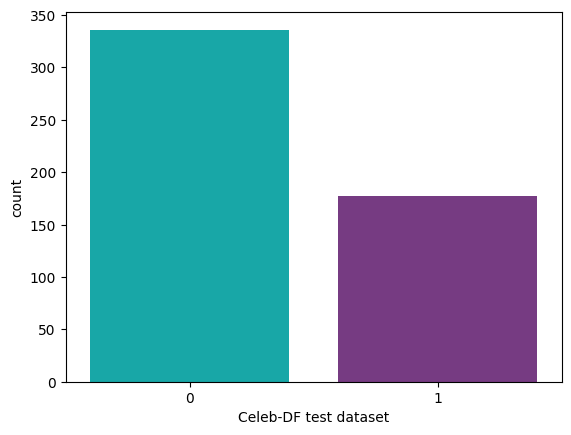

In [ ]:
# Build a dataframe for dataset       
dataset = pd.DataFrame(data=list(zip(test_filenames, test_labels)), columns=['imagename', 'class'], index=None)
# check the distribution of target varibale ( the data is balanced or not)
df = pd.DataFrame (test_labels, columns = ['target'])
#create bar chart of the number of examples per classes
sns.countplot(x='target',data=df,palette=[[0, 0.75, 0.75],[0.4940, 0.1840, 0.5560] ])
#set the title
plt.xlabel('Celeb-DF test dataset')
plt.title('')
#show the chart
plt.show()

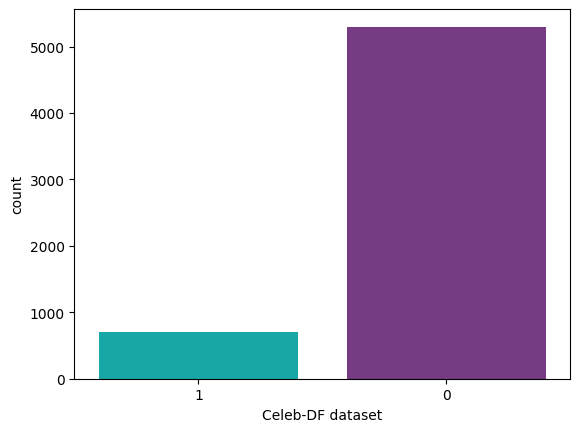

In [ ]:
# Build a dataframe for dataset  
data_filename = filenames + test_filenames
data_label = labels + test_labels       
dataset = pd.DataFrame(data=list(zip(filenames, labels)), columns=['imagename', 'class'], index=None)
# check the distribution of target varibale ( the data is balanced or not)
df = pd.DataFrame (labels, columns = ['target'])
#create bar chart of the number of examples per classes
sns.countplot(x='target',data=df,palette=[[0, 0.75, 0.75],[0.4940, 0.1840, 0.5560] ])

#set the title
plt.xlabel('Celeb-DF dataset')
plt.title('')

#show the chart
plt.show()


In [ ]:
# Print the first 5 entries of the dataset
dataset.head()

,imagename,class
0,./data/Celeb-DF-v2-frame/Celeb-real/id0_0000.jpg,1
1,./data/Celeb-DF-v2-frame/Celeb-real/id0_0002.jpg,1
2,./data/Celeb-DF-v2-frame/Celeb-real/id0_0003.jpg,1
3,./data/Celeb-DF-v2-frame/Celeb-real/id0_0004.jpg,1
4,./data/Celeb-DF-v2-frame/Celeb-real/id0_0005.jpg,1


In [ ]:
# Number of rows(image) X columns (imagename,class)
dataset.shape

(6011, 2)

In [ ]:
#loading the image
def load_img(path):
    #loads the image from its file
    image = cv2.imread(path)
    #check if the method returns an empty matrix. 
    if image is None:
        print('Wrong path:', path)
    else:
        #determining the size of the image 
        image = cv2.resize(image, (224, 224))
    #return the image 
    return image[...,::-1]

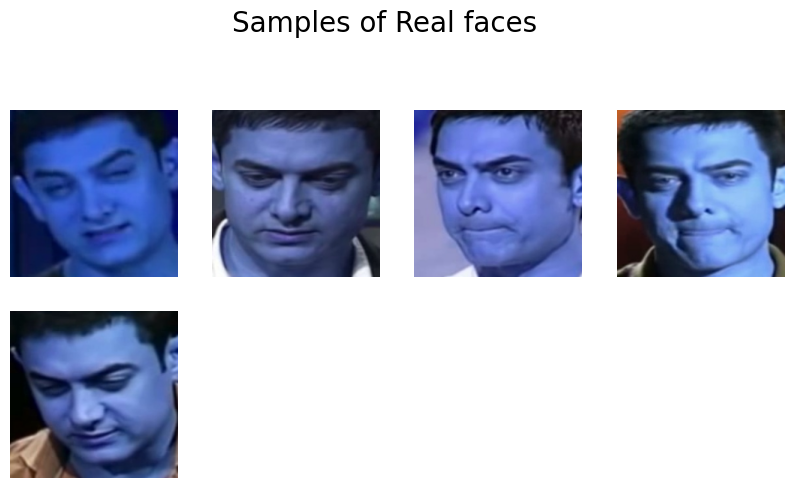

In [ ]:
#resize the image   
fig = plt.figure(figsize=(10, 10))
#loop to print fives images 
i = 0
for i in range(5):
    if(data_label[i] == '1'):
        # load path image depend on i
        path = data_filename[i]
        #show the images in 4×4 display and incerment i
        plt.subplot(4, 4, i + 1)
       #call the load_img() to get image and show it 
        plt.imshow(load_img(path), cmap='gray')
       #the title of display 
        plt.suptitle(("Samples of Real faces"), fontsize=20)
          #set the axis propreties of graph 
        plt.axis('off')

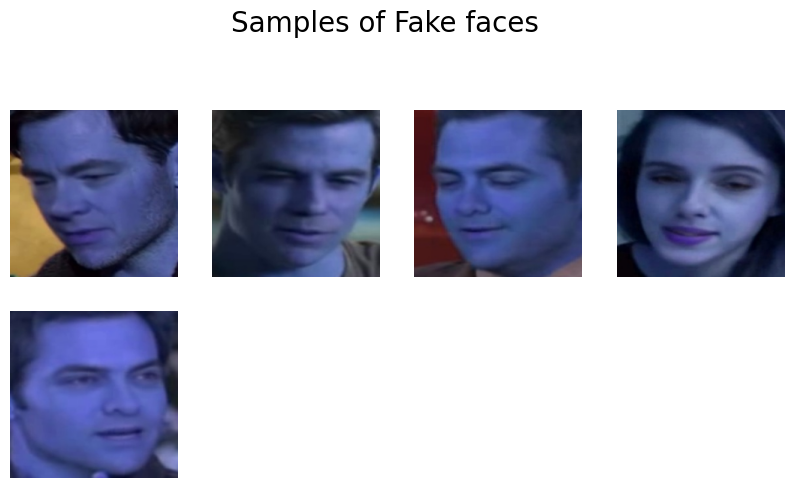

In [ ]:
#resize the image   
fig = plt.figure(figsize=(10, 10))
#loop to print fives images 
i = 0
for i in range(5):
    j = random.randrange(590, 700)
    if(data_label[j] == '0'):
        # load path image depend on i
        path = data_filename[j]
        #show the images in 4×4 display and incerment i
        plt.subplot(4, 4, i + 1)
        #call the load_img() to get image and show it 
        plt.imshow(load_img(path), cmap='gray')
        #the title of display 
        plt.suptitle(("Samples of Fake faces"), fontsize=20)
        #set the axis propreties of graph 
        plt.axis('off')

# 4. Model development

In [ ]:
#idintify input shape for model 
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
#Load model for classifiy image task
base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=input_shape,pooling = "max")
# Make model non-trainable. to use the pre-trained weights in our task
base_model.trainable = False
#make model sequential model layers that created will added to it
model = tf.keras.models.Sequential()
# add base model VGG-16
model.add(base_model)
#add dense layer for get result of classification
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# print model summary for parameter number and shapes
print(model.summary())
#compile model to be ready to be executed
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [ ]:
# start traning
#check and creat diroctary path for save model
if not exists("./model"):
    makedirs("./model")

# Keras backend
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "./model/" + 'vgg16' + ".hdf5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
)
#stopping the training once the model's performance stops improving on the validation Dataset after 10 times
stopping =  tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=0, restore_best_weights=True)


In [ ]:
#identify number of epochs and batch size
# number of passes of the entire training dataset the model has completed.
epochs = 10
# number of samples processed before the model is updated. 
batch_size = 16
# Train the model on training data
history = model.fit(x_train, y_train, batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val),
                    shuffle=True,
                    callbacks = [model_checkpoint, stopping])

Epoch 1/10
160/160 [==============================] - ETA: 0s - loss: 0.3517 - accuracy: 0.8774
Epoch 1: val_loss improved from 0.35708 to 0.35618, saving model to ./model\vgg16.hdf5
160/160 [==============================] - 2s 10ms/step - loss: 0.3517 - accuracy: 0.8774 - val_loss: 0.3562 - val_accuracy: 0.8825
Epoch 2/10
160/160 [==============================] - ETA: 0s - loss: 0.3509 - accuracy: 0.8774
Epoch 2: val_loss improved from 0.35618 to 0.35600, saving model to ./model\vgg16.hdf5
160/160 [==============================] - 1s 8ms/step - loss: 0.3509 - accuracy: 0.8774 - val_loss: 0.3560 - val_accuracy: 0.8825
Epoch 3/10
160/160 [==============================] - ETA: 0s - loss: 0.3498 - accuracy: 0.8774
Epoch 3: val_loss improved from 0.35600 to 0.35583, saving model to ./model\vgg16.hdf5
160/160 [==============================] - 1s 8ms/step - loss: 0.3498 - accuracy: 0.8774 - val_loss: 0.3558 - val_accuracy: 0.8825
Epoch 4/10
159/160 [============================>.] - ETA

# 5. Model evaluation



*   Visualize training results



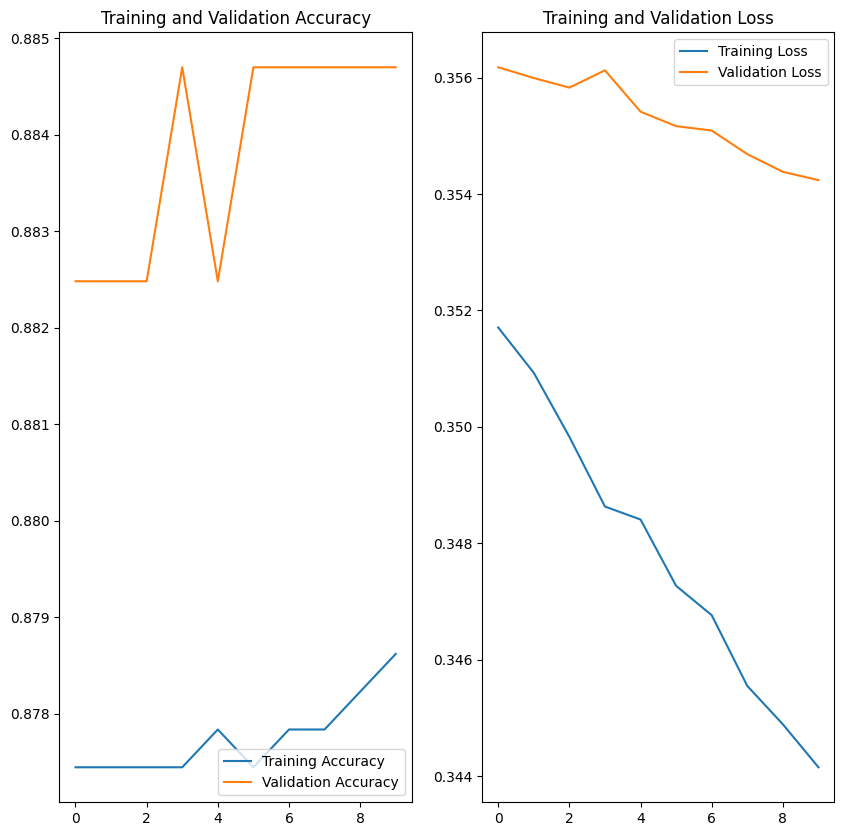

In [ ]:
# summarize history for accuracy and loss
#get train accuracy
acc = history.history['accuracy']
#get validation accuracy
val_acc = history.history['val_accuracy']
#get train loss
loss = history.history['loss']
#get validation loss
val_loss = history.history['val_loss']
#get range from 0 to epochs
epochs_range = range(epochs)
#set size of figure
plt.figure(figsize=(10, 10))
# set size of plot for accracy
plt.subplot(1, 2, 1)
# draw diagram for Training Accuracy
plt.plot(epochs_range, acc, label='Training Accuracy')
# draw diagram for Validation Accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#responsible for drawing legends associated with axes
plt.legend(loc='lower right')
#set title of chart
plt.title('Training and Validation Accuracy')
# set size of plot for loss
plt.subplot(1, 2, 2)
# draw diagram for Training loss
plt.plot(epochs_range, loss, label='Training Loss')
# draw diagram for Validation loss
plt.plot(epochs_range, val_loss, label='Validation Loss')
#responsible for drawing legends associated with axes
plt.legend(loc='upper right')
#set title of chart
plt.title('Training and Validation Loss')
#display
plt.show()



*   Model evaluation



In [ ]:
#evaluate model accuracy and loss at test dataset
test_loss, test_score = model.evaluate(x_test, y_test, batch_size=batch_size)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

16/16 [==============================] - 0s 17ms/step - loss: 0.7429 - accuracy: 0.6562
Loss on test set:  0.7428895235061646
Accuracy on test set:  0.65625


In [ ]:
#helper function to determin result of classification in binary
def determin(preds):
 le_pred =[]   
 for i in preds:
     if i < 0.5:
         le_pred.append(0)
     else:
         le_pred.append(1)

 return le_pred

In [ ]:
# Get predictions
preds = model.predict(x_test, batch_size=batch_size)
y_train_pred = model.predict(x_train, batch_size=batch_size)
#Return a copy of the array collapsed into one dimension.
y_test_predd = preds.flatten()
y_train_pred = y_train_pred.flatten()
#Convert prediction to binary
y_test_predd = determin(y_test_predd)
y_train_pred = determin(y_train_pred)

# Original labels
print(y_test.shape)
# predicted labels
print(preds.shape)

160/160 [==============================] - 1s 5ms/step
(256, 1)
(256, 1)




*   confusion matrix



[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

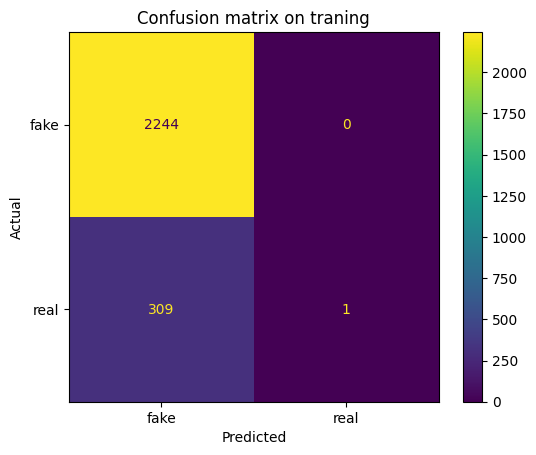

In [ ]:
# Get the confusion matrix
#confusion_matrix,ConfusionMatrixDisplay : to dealing and show confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# Build the confusion matrix for label prediction in traning dataset
cm = confusion_matrix(y_train, y_train_pred)

# Build the display object that display the confusion matrix with coreesponding label name
cmd = ConfusionMatrixDisplay(cm, display_labels=['fake','real'])

# Plot the confusion matrix with title and axises names
cmd.plot()
cmd.ax_.set_title("Confusion matrix on traning")
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')

# 0: fake, 1: real
# positive: fake, negative: real

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

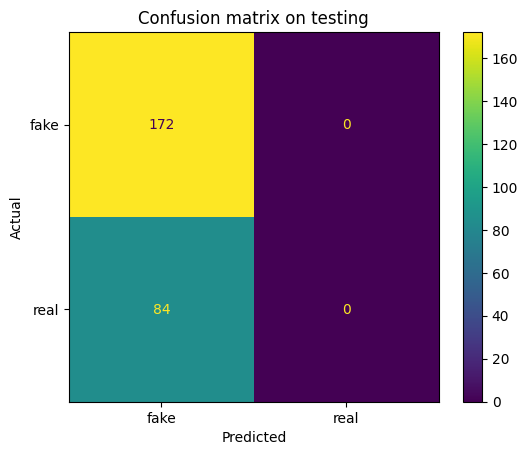

In [ ]:
# Build the confusion matrix for label prediction in testing dataset
cm = confusion_matrix(y_test, y_test_predd)

# Build the display object that display the confusion matrix with coreesponding label name
cmd = ConfusionMatrixDisplay(cm, display_labels=['fake','real'])

# Plot the confusion matrix with title and axises names
cmd.plot()
cmd.ax_.set_title("Confusion matrix on testing")
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')
# 1: fake, 0: real
# positive: fake, negative: real

- Accuracy, precision, recall and F1 score on train and test dataset

In [ ]:
# calculate each evaluation matrics in training and testing prediction
# traning: to see the overfitting and underfitting
# testing: to see how well our model does
#precision_score : evaluation metric for train and test sets 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('The training accuracy: ' + str(accuracy_score(y_train, y_train_pred)))
print('The testing accuracy: '+ str(accuracy_score(y_test, y_test_predd)))

print('\n\n')

print('The traning precision: ' + str(precision_score(y_train, y_train_pred)))
print('The testing precision: ' + str(precision_score(y_test, y_test_predd)))

print('\n\n')

print('The traning recall: ' + str(recall_score(y_train, y_train_pred)))
print('The testing recall: ' + str(recall_score(y_test, y_test_predd)))

print('\n\n')

print('The traning F1: ' + str(f1_score(y_train, y_train_pred)))
print('The testing F1: ' + str(f1_score(y_test, y_test_predd)))

The training accuracy: 0.8786217697729053
The testing accuracy: 0.65625



The traning precision: 1.0
The testing precision: 1.0



The traning recall: 0.009584664536741214
The testing recall: 0.011235955056179775



The traning F1: 0.0189873417721519
The testing F1: 0.02222222222222222


# 6. Hyperparameter Tuning using Jaya Optimization 



*   cost function



In [ ]:
#define fittness function as accuracy of model
def myfitt(p1):
    # F is list for append result 
    F=[]
    # loop from 0 to pop_size
    for i in range (len(p1)):
        # x is values of epoch and learning rate
        x=p1.loc[i]
        #VGG16 build
        #print("Running solution with this parameter :",x)
        # the input shape for model
        input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
        # Instantiates the VGG16 model.
        base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=input_shape,pooling ="max")
        # freezing all the weights
        base_model.trainable = False
        #  groups a linear of layers
        model = tf.keras.models.Sequential()
        # layer 1 is base_model
        model.add(base_model)
        # layer 2 is Dense
        model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
        #compile model to be ready to be executed
        model.compile(optimizer=tf.keras.optimizers.Adam(lr=x[0]),
              loss='binary_crossentropy',
              metrics=['accuracy'])
        # Train the model on training data
        history = model.fit(x_train, y_train, batch_size=16,
                    epochs=int(x[1]),
                    verbose=1,
                    validation_data=(x_val, y_val),
                    shuffle=True,
                    callbacks = [model_checkpoint, stopping])
        # evaluate model accuracy and loss at test dataset
        test_loss, test_score = model.evaluate(x_test, y_test, batch_size=16)
        # append result (accuracy) to F list
        F.append(test_score)
        
    return F



*   Initialize population 



In [ ]:
# define initial population function
def initialpopulation(mini,maxi,pop_size):
    # pop is list for collect poplustion solution 
    pop=[]    
    #in each p there will have 10 iteration = solution 
    for i in range(pop_size):
        # p is for collect one solution  
        p=[]  
        # Ep is list for eopch step of 5  
        Ep = [10,15,20,25,30,35,40,45]
        #to random variable between ub an lb 
        for a,b in zip(mini,maxi): 
            # append value of learning rate
            p.append(round((a + (b-a) * random.random()),2))
            # append value of epochs
            p.append(random.choice(Ep))
          i=i+1
        # append soluation to popluaion 
        pop.append(p)
    # construct DataFrame for popluation  
    ini_pop=pd.DataFrame(pop)        
    return ini_pop



*   Update population


In [ ]:
# In every iteration, the solutions are updated based on the strategy
# define update population function
def updatepopulation(p1,dim): 
    #best is the highest accuracy     
    best_x=np.array((p1.loc[p1['f'].idxmax()][0:dim]).any())   
    #worst is the lowest accuracy 
    worst_x=np.array((p1.loc[p1['f'].idxmin()][0:dim]).any()) 
    #new_x is list for append new solation to popluation
    new_x=[]
    #loop from 0 to popluation size
    for i in range(len(p1)): 
        # old_x is soluation in previous popluation
        old_x=np.array(p1.loc[i][0:dim]) 
        # define r1 is random number           
        r1=np.random.random(dim)
        # define r1 is random number 
        r2=np.random.random(dim)
        # the new values of learning rate and epochs for the other candidates are calculated.
        new_x.append(old_x+r1*(best_x-abs(old_x))-r2*(worst_x-abs(old_x)))    
    # construct DataFrame for popluation 
    new_p1=pd.DataFrame(new_x)    
    return new_p1



*   Trimer



In [ ]:
#  trim the variables to their respective bounds.
# define trimr function
def trimr(new_p1,lb,ub): 
    # Return values of epoch and learning rate of popluation  
    col=new_p1.columns.values
    # loop from 0 to population size    
    for i in range(len(new_p1)):        
        # loop from 0 to col size , number od variable
        for j in range(len(col)):
            # check if exceed the upper bound            
            if new_p1.loc[i][j]>ub[j]:                
                  new_p1.loc[i][j]=ub[j] 
            # check if less than the lower bound           
            elif new_p1.loc[i][j]<lb[j]:                          
                  new_p1.loc[i][j]=lb[j]    
    return new_p1




*   Selector



In [ ]:
# in every generation keeps only the good solution and completely discards the poor solution.
#define selector function
def greedyselector(p1,new_p1):
    # loop from 0 to popualation size    
    for i in range(len(p1)):
        # if prevous soluation is less than new soluation        
        if p1.loc[i]['f']<new_p1.loc[i]['f']:                 
            p1.loc[i]=new_p1.loc[i]    
    return p1



*   Jaya function





In [ ]:
# All the above mentioned functions have to be executed in a loop
# define jaya function
def jaya(*argv):
    # parameters
    pop_size, Gen, mini, maxi, no_var = argv
    # lb is lower bound
    lb=np.array(mini)
    # up is upper bound
    ub=np.array(maxi)
    # init the first population
    p1=initialpopulation(lb,ub,pop_size)
    # set soluation fittness function value 
    p1['f']=myfitt(p1)
    # print("the first popluation is :",p1)
    # dim is number of variable
    dim=len(lb)
    # gen is counter for generation
    gen=0
    # best list to save best soluation
    best=[]
    # loop 
    while (gen<Gen):
        # print("Here itration number :",gen)
        # update population
        new_p1=updatepopulation(p1,dim)
        # check updated population
        new_p1=trimr(new_p1,lb,ub)
        # set soluations fittness function value
        new_p1['f']=myfitt(new_p1)
        # select best solautions
        p1=greedyselector(p1,new_p1)
        # increment generation number
        gen=gen+1
        # print(p1)
        # print(gen)
        # save result of best soluation 
        best=p1['f'].max()
        # save values of best soluation 
        xbest=p1.loc[p1['f'].idxmax()][0:dim].tolist()
        # print('Best={}'.format(best))
        # print('xbest={}'.format(xbest))
    return best,xbest

*start parameter tuning*

In [ ]:
# population size
pop_size=6
# number of generation
Gen =6
# lower bound 0.0001 for lraning rate , 1 for epochs
lb = [0.0001,1]
# upper bound 0.01 for lraning rate , 45 for epochs
ub = [0.01,45]
# number of parameter 
no_var = 2
# init parameter tuning 
best,xbest = jaya(pop_size, Gen, lb, ub,no_var)

Running solution with this parameter : 0     0.01
1    20.00
Name: 0, dtype: float64
Epoch 1/20
156/160 [============================>.] - ETA: 0s - loss: 0.3989 - accuracy: 0.8758
Epoch 1: val_loss did not improve from 0.35424
160/160 [==============================] - 2s 9ms/step - loss: 0.3975 - accuracy: 0.8755 - val_loss: 0.3713 - val_accuracy: 0.8692
Epoch 2/20
159/160 [============================>.] - ETA: 0s - loss: 0.3395 - accuracy: 0.8825
Epoch 2: val_loss did not improve from 0.35424
160/160 [==============================] - 1s 8ms/step - loss: 0.3400 - accuracy: 0.8821 - val_loss: 0.3638 - val_accuracy: 0.8825
Epoch 3/20
159/160 [============================>.] - ETA: 0s - loss: 0.3334 - accuracy: 0.8801
Epoch 3: val_loss did not improve from 0.35424
160/160 [==============================] - 1s 8ms/step - loss: 0.3326 - accuracy: 0.8806 - val_loss: 0.3845 - val_accuracy: 0.8869
Epoch 4/20
155/160 [============================>.] - ETA: 0s - loss: 0.3129 - accuracy: 0.88

Epoch 10/40
160/160 [==============================] - ETA: 0s - loss: 0.8910 - accuracy: 0.2318
Epoch 10: val_loss did not improve from 0.35424
160/160 [==============================] - 1s 8ms/step - loss: 0.8910 - accuracy: 0.2318 - val_loss: 0.8831 - val_accuracy: 0.2173
Epoch 11/40
153/160 [===========================>..] - ETA: 0s - loss: 0.8926 - accuracy: 0.2324
Epoch 11: val_loss did not improve from 0.35424
16/16 [==============================] - 0s 6ms/step - loss: 0.7801 - accuracy: 0.4102
Running solution with this parameter : 0     0.01
1    20.00
Name: 5, dtype: float64
Epoch 1/20
155/160 [============================>.] - ETA: 0s - loss: 0.4062 - accuracy: 0.8690
Epoch 1: val_loss did not improve from 0.35424
160/160 [==============================] - 2s 9ms/step - loss: 0.4009 - accuracy: 0.8712 - val_loss: 0.3792 - val_accuracy: 0.8891
Epoch 2/20
154/160 [===========================>..] - ETA: 0s - loss: 0.3409 - accuracy: 0.8815
Epoch 2: val_loss did not improve fro

Epoch 2/29
153/160 [===========================>..] - ETA: 0s - loss: 0.3826 - accuracy: 0.8775
Epoch 2: val_loss did not improve from 0.35424
160/160 [==============================] - 1s 8ms/step - loss: 0.3825 - accuracy: 0.8774 - val_loss: 0.3746 - val_accuracy: 0.8825
Epoch 3/29
159/160 [============================>.] - ETA: 0s - loss: 0.3788 - accuracy: 0.8774
Epoch 3: val_loss did not improve from 0.35424
160/160 [==============================] - 1s 8ms/step - loss: 0.3784 - accuracy: 0.8774 - val_loss: 0.3729 - val_accuracy: 0.8825
Epoch 4/29
159/160 [============================>.] - ETA: 0s - loss: 0.3744 - accuracy: 0.8778
Epoch 4: val_loss did not improve from 0.35424
160/160 [==============================] - 1s 8ms/step - loss: 0.3749 - accuracy: 0.8774 - val_loss: 0.3713 - val_accuracy: 0.8825
Epoch 5/29
159/160 [============================>.] - ETA: 0s - loss: 0.3707 - accuracy: 0.8781
Epoch 5: val_loss did not improve from 0.35424
160/160 [==========================

159/160 [============================>.] - ETA: 0s - loss: 0.2803 - accuracy: 0.8943
Epoch 12: val_loss did not improve from 0.35424
16/16 [==============================] - 0s 6ms/step - loss: 0.6603 - accuracy: 0.6953
      0          1         f
0  0.01  30.741563  0.691406
1  0.00  10.000000  0.652344
2  0.01  15.000000  0.667969
3  0.01  20.000000  0.671875
4  0.01  38.388802  0.703125
5  0.01  20.000000  0.695312
Here itration number : 1
Running solution with this parameter : 0     0.010000
1    21.763114
Name: 0, dtype: float64
Epoch 1/21
156/160 [============================>.] - ETA: 0s - loss: 0.4254 - accuracy: 0.8678
Epoch 1: val_loss did not improve from 0.35424
160/160 [==============================] - 2s 9ms/step - loss: 0.4215 - accuracy: 0.8692 - val_loss: 0.3937 - val_accuracy: 0.8869
Epoch 2/21
155/160 [============================>.] - ETA: 0s - loss: 0.3608 - accuracy: 0.8774
Epoch 2: val_loss did not improve from 0.35424
160/160 [==============================] -

16/16 [==============================] - 0s 6ms/step - loss: 0.7237 - accuracy: 0.7109
Running solution with this parameter : 0     0.000100
1    43.981709
Name: 4, dtype: float64
Epoch 1/43
157/160 [============================>.] - ETA: 0s - loss: 0.5031 - accuracy: 0.7994
Epoch 1: val_loss did not improve from 0.35424
160/160 [==============================] - 2s 9ms/step - loss: 0.5002 - accuracy: 0.8011 - val_loss: 0.3857 - val_accuracy: 0.8825
Epoch 2/43
154/160 [===========================>..] - ETA: 0s - loss: 0.3866 - accuracy: 0.8791
Epoch 2: val_loss did not improve from 0.35424
160/160 [==============================] - 1s 8ms/step - loss: 0.3899 - accuracy: 0.8774 - val_loss: 0.3750 - val_accuracy: 0.8825
Epoch 3/43
154/160 [===========================>..] - ETA: 0s - loss: 0.3860 - accuracy: 0.8766
Epoch 3: val_loss did not improve from 0.35424
160/160 [==============================] - 1s 8ms/step - loss: 0.3848 - accuracy: 0.8774 - val_loss: 0.3729 - val_accuracy: 0.882

160/160 [==============================] - 2s 10ms/step - loss: 0.4026 - accuracy: 0.8712 - val_loss: 0.3473 - val_accuracy: 0.8847
Epoch 2/21
158/160 [============================>.] - ETA: 0s - loss: 0.3604 - accuracy: 0.8797
Epoch 2: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3613 - accuracy: 0.8790 - val_loss: 0.3584 - val_accuracy: 0.8847
Epoch 3/21
157/160 [============================>.] - ETA: 0s - loss: 0.3229 - accuracy: 0.8901
Epoch 3: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3259 - accuracy: 0.8888 - val_loss: 0.4537 - val_accuracy: 0.8248
Epoch 4/21
154/160 [===========================>..] - ETA: 0s - loss: 0.3361 - accuracy: 0.8799
Epoch 4: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3314 - accuracy: 0.8810 - val_loss: 0.3809 - val_accuracy: 0.8537
Epoch 5/21
159/160 [==========================

Epoch 15/45
159/160 [============================>.] - ETA: 0s - loss: 0.3568 - accuracy: 0.8774
Epoch 15: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3568 - accuracy: 0.8774 - val_loss: 0.3566 - val_accuracy: 0.8825
Epoch 16/45
158/160 [============================>.] - ETA: 0s - loss: 0.3537 - accuracy: 0.8778
Epoch 16: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3551 - accuracy: 0.8774 - val_loss: 0.3558 - val_accuracy: 0.8825
Epoch 17/45
158/160 [============================>.] - ETA: 0s - loss: 0.3540 - accuracy: 0.8774
Epoch 17: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3538 - accuracy: 0.8774 - val_loss: 0.3552 - val_accuracy: 0.8825
Epoch 18/45
159/160 [============================>.] - ETA: 0s - loss: 0.3528 - accuracy: 0.8774
Epoch 18: val_loss did not improve from 0.34734
160/160 [==================

Epoch 45/45
155/160 [============================>.] - ETA: 0s - loss: 0.3299 - accuracy: 0.8802
Epoch 45: val_loss did not improve from 0.34734
16/16 [==============================] - 0s 6ms/step - loss: 0.7242 - accuracy: 0.6602
Running solution with this parameter : 0     0.010000
1    25.128878
Name: 5, dtype: float64
Epoch 1/25
156/160 [============================>.] - ETA: 0s - loss: 0.3963 - accuracy: 0.8738
Epoch 1: val_loss did not improve from 0.34734
160/160 [==============================] - 2s 9ms/step - loss: 0.3937 - accuracy: 0.8751 - val_loss: 0.3704 - val_accuracy: 0.8891
Epoch 2/25
158/160 [============================>.] - ETA: 0s - loss: 0.3570 - accuracy: 0.8766
Epoch 2: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3557 - accuracy: 0.8774 - val_loss: 0.3737 - val_accuracy: 0.8647
Epoch 3/25
160/160 [==============================] - ETA: 0s - loss: 0.3241 - accuracy: 0.8868
Epoch 3: val_loss did not impro

Epoch 17/29
160/160 [==============================] - ETA: 0s - loss: 0.3451 - accuracy: 0.8782
Epoch 17: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3451 - accuracy: 0.8782 - val_loss: 0.3634 - val_accuracy: 0.8825
Epoch 18/29
160/160 [==============================] - ETA: 0s - loss: 0.3436 - accuracy: 0.8782
Epoch 18: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3436 - accuracy: 0.8782 - val_loss: 0.3637 - val_accuracy: 0.8825
Epoch 19/29
153/160 [===========================>..] - ETA: 0s - loss: 0.3396 - accuracy: 0.8799
Epoch 19: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3430 - accuracy: 0.8782 - val_loss: 0.3624 - val_accuracy: 0.8847
Epoch 20/29
160/160 [==============================] - ETA: 0s - loss: 0.3418 - accuracy: 0.8782
Epoch 20: val_loss did not improve from 0.34734
160/160 [==================

160/160 [==============================] - 1s 8ms/step - loss: 0.3683 - accuracy: 0.8774 - val_loss: 0.3696 - val_accuracy: 0.8825
Epoch 4/9
153/160 [===========================>..] - ETA: 0s - loss: 0.3626 - accuracy: 0.8787
Epoch 4: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3657 - accuracy: 0.8774 - val_loss: 0.3677 - val_accuracy: 0.8825
Epoch 5/9
153/160 [===========================>..] - ETA: 0s - loss: 0.3630 - accuracy: 0.8779
Epoch 5: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3636 - accuracy: 0.8774 - val_loss: 0.3666 - val_accuracy: 0.8825
Epoch 6/9
153/160 [===========================>..] - ETA: 0s - loss: 0.3630 - accuracy: 0.8766
Epoch 6: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3611 - accuracy: 0.8774 - val_loss: 0.3656 - val_accuracy: 0.8825
Epoch 7/9
153/160 [===========================>..]

Epoch 24/35
153/160 [===========================>..] - ETA: 0s - loss: 0.3419 - accuracy: 0.8787
Epoch 24: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3439 - accuracy: 0.8774 - val_loss: 0.3543 - val_accuracy: 0.8847
Epoch 25/35
160/160 [==============================] - ETA: 0s - loss: 0.3436 - accuracy: 0.8774
Epoch 25: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3436 - accuracy: 0.8774 - val_loss: 0.3544 - val_accuracy: 0.8869
Epoch 26/35
153/160 [===========================>..] - ETA: 0s - loss: 0.3416 - accuracy: 0.8779
Epoch 26: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3426 - accuracy: 0.8774 - val_loss: 0.3540 - val_accuracy: 0.8847
Epoch 27/35
153/160 [===========================>..] - ETA: 0s - loss: 0.3403 - accuracy: 0.8783
Epoch 27: val_loss did not improve from 0.34734
160/160 [==================

154/160 [===========================>..] - ETA: 0s - loss: 0.3577 - accuracy: 0.8762
Epoch 2: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3594 - accuracy: 0.8755 - val_loss: 0.3793 - val_accuracy: 0.8647
Epoch 3/25
153/160 [===========================>..] - ETA: 0s - loss: 0.3241 - accuracy: 0.8832
Epoch 3: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3297 - accuracy: 0.8829 - val_loss: 0.3711 - val_accuracy: 0.8780
Epoch 4/25
153/160 [===========================>..] - ETA: 0s - loss: 0.3153 - accuracy: 0.8897
Epoch 4: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3181 - accuracy: 0.8892 - val_loss: 0.3832 - val_accuracy: 0.8780
Epoch 5/25
153/160 [===========================>..] - ETA: 0s - loss: 0.3359 - accuracy: 0.8836
Epoch 5: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 

160/160 [==============================] - 1s 8ms/step - loss: 0.3446 - accuracy: 0.8782 - val_loss: 0.3584 - val_accuracy: 0.8847
Epoch 20/22
153/160 [===========================>..] - ETA: 0s - loss: 0.3378 - accuracy: 0.8811
Epoch 20: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3440 - accuracy: 0.8782 - val_loss: 0.3582 - val_accuracy: 0.8847
Epoch 21/22
153/160 [===========================>..] - ETA: 0s - loss: 0.3448 - accuracy: 0.8779
Epoch 21: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3430 - accuracy: 0.8786 - val_loss: 0.3580 - val_accuracy: 0.8847
Epoch 22/22
153/160 [===========================>..] - ETA: 0s - loss: 0.3407 - accuracy: 0.8787
Epoch 22: val_loss did not improve from 0.34734
16/16 [==============================] - 0s 6ms/step - loss: 0.7511 - accuracy: 0.6523
Running solution with this parameter : 0     0.000100
1    10.579685
Name: 1, dtype: 

160/160 [==============================] - 1s 8ms/step - loss: 0.3256 - accuracy: 0.8868 - val_loss: 0.3889 - val_accuracy: 0.8869
Epoch 5/19
153/160 [===========================>..] - ETA: 0s - loss: 0.3105 - accuracy: 0.8901
Epoch 5: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3110 - accuracy: 0.8904 - val_loss: 0.3660 - val_accuracy: 0.8825
Epoch 6/19
153/160 [===========================>..] - ETA: 0s - loss: 0.3084 - accuracy: 0.8873
Epoch 6: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3026 - accuracy: 0.8896 - val_loss: 0.3983 - val_accuracy: 0.8803
Epoch 7/19
153/160 [===========================>..] - ETA: 0s - loss: 0.2849 - accuracy: 0.8946
Epoch 7: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.2853 - accuracy: 0.8951 - val_loss: 0.4023 - val_accuracy: 0.8803
Epoch 8/19
153/160 [===========================

159/160 [============================>.] - ETA: 0s - loss: 0.3555 - accuracy: 0.8774
Epoch 20: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3553 - accuracy: 0.8774 - val_loss: 0.3692 - val_accuracy: 0.8825
Epoch 21/32
158/160 [============================>.] - ETA: 0s - loss: 0.3550 - accuracy: 0.8778
Epoch 21: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3542 - accuracy: 0.8782 - val_loss: 0.3686 - val_accuracy: 0.8825
Epoch 22/32
158/160 [============================>.] - ETA: 0s - loss: 0.3514 - accuracy: 0.8790
Epoch 22: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3530 - accuracy: 0.8782 - val_loss: 0.3678 - val_accuracy: 0.8825
Epoch 23/32
156/160 [============================>.] - ETA: 0s - loss: 0.3534 - accuracy: 0.8774
Epoch 23: val_loss did not improve from 0.34734
160/160 [==============================

Epoch 2/25
153/160 [===========================>..] - ETA: 0s - loss: 0.3984 - accuracy: 0.8766
Epoch 2: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3964 - accuracy: 0.8774 - val_loss: 0.3855 - val_accuracy: 0.8825
Epoch 3/25
158/160 [============================>.] - ETA: 0s - loss: 0.3886 - accuracy: 0.8774
Epoch 3: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3889 - accuracy: 0.8774 - val_loss: 0.3822 - val_accuracy: 0.8825
Epoch 4/25
160/160 [==============================] - ETA: 0s - loss: 0.3855 - accuracy: 0.8774
Epoch 4: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3855 - accuracy: 0.8774 - val_loss: 0.3802 - val_accuracy: 0.8825
Epoch 5/25
158/160 [============================>.] - ETA: 0s - loss: 0.3822 - accuracy: 0.8774
Epoch 5: val_loss did not improve from 0.34734
160/160 [==========================

Epoch 36/36
160/160 [==============================] - ETA: 0s - loss: 0.3331 - accuracy: 0.8810
Epoch 36: val_loss did not improve from 0.34734
16/16 [==============================] - 0s 6ms/step - loss: 0.7225 - accuracy: 0.6562
Running solution with this parameter : 0     0.010000
1    19.232834
Name: 5, dtype: float64
Epoch 1/19
158/160 [============================>.] - ETA: 0s - loss: 0.3904 - accuracy: 0.8703
Epoch 1: val_loss did not improve from 0.34734
160/160 [==============================] - 2s 9ms/step - loss: 0.3880 - accuracy: 0.8716 - val_loss: 0.3591 - val_accuracy: 0.8847
Epoch 2/19
157/160 [============================>.] - ETA: 0s - loss: 0.3465 - accuracy: 0.8798
Epoch 2: val_loss did not improve from 0.34734
160/160 [==============================] - 1s 8ms/step - loss: 0.3473 - accuracy: 0.8798 - val_loss: 0.3627 - val_accuracy: 0.8847
Epoch 3/19
157/160 [============================>.] - ETA: 0s - loss: 0.3235 - accuracy: 0.8818
Epoch 3: val_loss did not impro

In [ ]:
# print best solation result and its values 
print('The Accuracy value = {}'.format(best))
print('The optimum values of variables = {}'.format(xbest))

The Accuracy value = 0.7109375
The optimum values of variables = [0.01, 15.297839885926038]


# 7. Model improvement



*   Build model with optimum values of parameters


In [ ]:
#idintify input shape for model 
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
#Load model for classifiy image task
base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=input_shape,pooling ="max")
# Make model non-trainable. to use the pre-trained weights in our task
base_model.trainable = False
#make model sequential model layers that created will added to it
model = tf.keras.models.Sequential()
# add base model VGG-16
model.add(base_model)
#add dense layer for get result of classification
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
#compile model to be ready to be executed
model.compile(optimizer=tf.keras.optimizers.Adam(lr=xbest[0]),
     loss='binary_crossentropy',
     metrics=['accuracy'])
# print model summary for parameter number and shapes
print(model.summary())



Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_46 (Dense)            (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________
None




*   Training model


In [ ]:
# set epoch and learning rate as we get from jaya tuning
epochs = int(xbest[1])
# Train the model on training data
history2 = model.fit(x_train, y_train, batch_size=16,
         epochs=epochs,
         verbose=1,
         validation_data=(x_val, y_val),
         shuffle=True,
         callbacks = [model_checkpoint, stopping]
                    )

Epoch 1/15
160/160 [==============================] - 2s 8ms/step - loss: 0.4090 - accuracy: 0.8731 - val_loss: 0.3862 - val_accuracy: 0.8625
Epoch 2/15
160/160 [==============================] - 1s 8ms/step - loss: 0.3621 - accuracy: 0.8790 - val_loss: 0.4543 - val_accuracy: 0.8869
Epoch 3/15
160/160 [==============================] - 1s 8ms/step - loss: 0.3417 - accuracy: 0.8786 - val_loss: 0.3730 - val_accuracy: 0.8803
Epoch 4/15
160/160 [==============================] - 1s 8ms/step - loss: 0.3361 - accuracy: 0.8786 - val_loss: 0.4046 - val_accuracy: 0.8825
Epoch 5/15
160/160 [==============================] - 1s 8ms/step - loss: 0.3132 - accuracy: 0.8896 - val_loss: 0.3997 - val_accuracy: 0.8492
Epoch 6/15
160/160 [==============================] - 1s 8ms/step - loss: 0.3016 - accuracy: 0.8915 - val_loss: 0.3960 - val_accuracy: 0.8780
Epoch 7/15
160/160 [==============================] - 1s 8ms/step - loss: 0.2812 - accuracy: 0.8951 - val_loss: 0.3774 - val_accuracy: 0.8670
Epoch 



*   Evaluate model training 

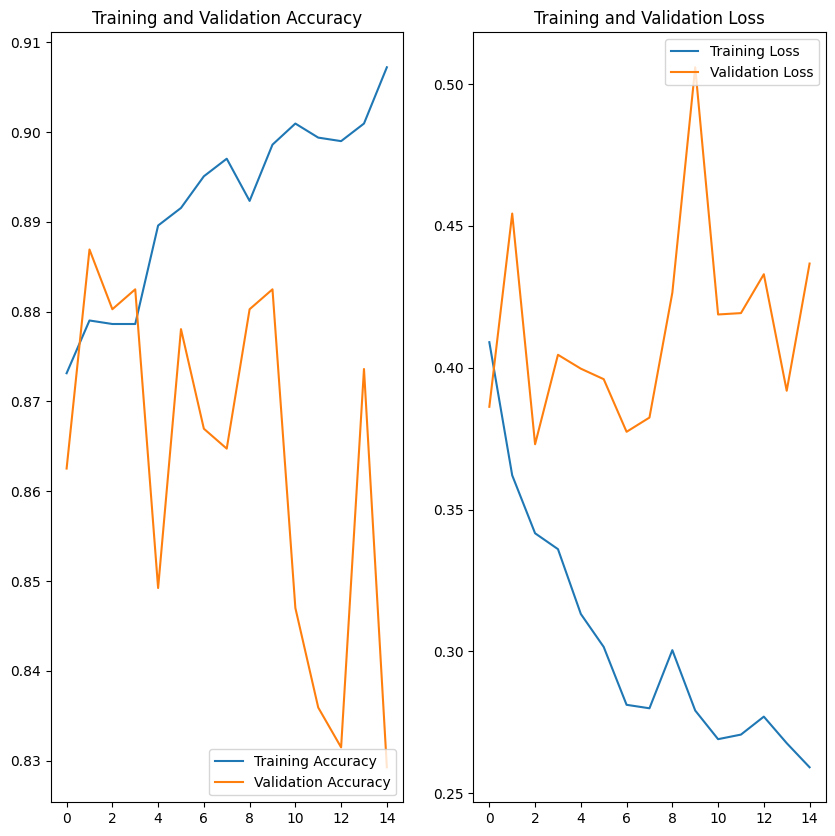

In [ ]:
# summarize history for accuracy and loss
#get train accuracy
acc = history2.history['accuracy']
#get validation accuracy
val_acc = history2.history['val_accuracy']
#get train loss
loss = history2.history['loss']
#get validation loss
val_loss = history2.history['val_loss']
#get range from 0 to epochs
epochs_range = range(epochs)
#set size of figure
plt.figure(figsize=(10, 10))
# set size of plot for accracy
plt.subplot(1, 2, 1)
# draw diagram for Training Accuracy
plt.plot(epochs_range, acc, label='Training Accuracy')
# draw diagram for Validation Accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#responsible for drawing legends associated with axes
plt.legend(loc='lower right')
#set title of chart
plt.title('Training and Validation Accuracy')
# set size of plot for loss
plt.subplot(1, 2, 2)
# draw diagram for Training loss
plt.plot(epochs_range, loss, label='Training Loss')
# draw diagram for Validation loss
plt.plot(epochs_range, val_loss, label='Validation Loss')
#responsible for drawing legends associated with axes
plt.legend(loc='upper right')
#set title of chart
plt.title('Training and Validation Loss')
#display
plt.show()



*   Confusion matrix



In [ ]:
# Get predictions
preds = model.predict(x_test, batch_size=batch_size)
y_train_pred = model.predict(x_train, batch_size=batch_size)
#Return a copy of the array collapsed into one dimension.
y_test_predd = preds.flatten()
y_train_pred = y_train_pred.flatten()
#Convert prediction to binary
y_test_predd = determin(y_test_predd)
y_train_pred = determin(y_train_pred)

# Original labels
print(y_test.shape)
# predicted labels
print(preds.shape)

160/160 [==============================] - 1s 5ms/step
(256, 1)
(256, 1)


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

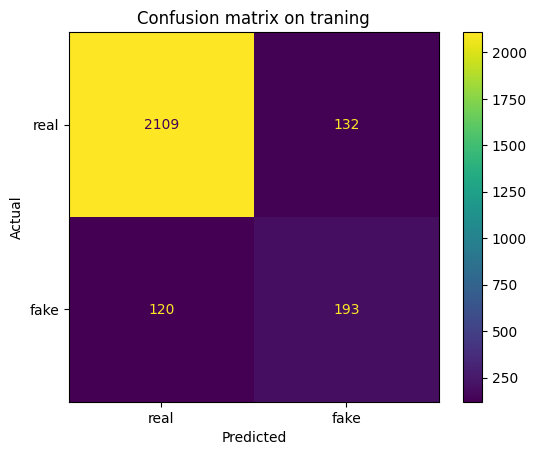

In [ ]:
# Get the confusion matrix
# Build the confusion matrix for label prediction in traning dataset
cm = confusion_matrix(y_train, y_train_pred)

# Build the display object that display the confusion matrix with coreesponding label name
cmd = ConfusionMatrixDisplay(cm, display_labels=['real','fake'])

# Plot the confusion matrix with title and axises names
cmd.plot()
cmd.ax_.set_title("Confusion matrix on traning")
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')

# 1: fake, 0: real
# positive: fake, negative: real

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

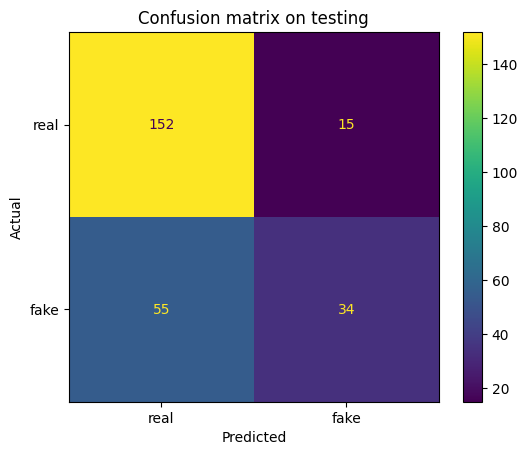

In [ ]:
# Build the confusion matrix for label prediction in testing dataset
cm = confusion_matrix(y_test, y_test_predd)

# Build the display object that display the confusion matrix with coreesponding label name
cmd = ConfusionMatrixDisplay(cm, display_labels=['real','fake'])

# Plot the confusion matrix with title and axises names
cmd.plot()
cmd.ax_.set_title("Confusion matrix on testing")
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')

# 1: fake, 0: real
# positive: fake, negative: real

- Accuracy, precision, recall and F1 score on train and test dataset

In [ ]:
# calculate each evaluation matrics in training and testing prediction
# traning: to see the overfitting and underfitting
# testing: to see how well our model does
#precision_score : evaluation metric for train and test sets 
print('The training accuracy: ' + str(accuracy_score(y_train, y_train_pred)))
print('The testing accuracy: '+ str(accuracy_score(y_test, y_test_predd)))

print('\n\n')

print('The traning precision: ' + str(precision_score(y_train, y_train_pred)))
print('The testing precision: ' + str(precision_score(y_test, y_test_predd)))

print('\n\n')

print('The traning recall: ' + str(recall_score(y_train, y_train_pred)))
print('The testing recall: ' + str(recall_score(y_test, y_test_predd)))

print('\n\n')

print('The traning F1: ' + str(f1_score(y_train, y_train_pred)))
print('The testing F1: ' + str(f1_score(y_test, y_test_predd)))

The training accuracy: 0.9013312451057165
The testing accuracy: 0.7265625



The traning precision: 0.5938461538461538
The testing precision: 0.6938775510204082



The traning recall: 0.6166134185303515
The testing recall: 0.38202247191011235



The traning F1: 0.6050156739811912
The testing F1: 0.4927536231884058



# 8.Analyze the results

Our project which applied the combination of the VGG16 architecture with the Jaya algorithm optimization,  is highly effective in detecting deepfake videos.  The model was evaluated on the  Celeb-DF dataset. The proposed model achieved an accuracy of 72.6%, which is higher than the accuracy achieved by VGG16 without optimization which achieved an accuracy of 65.6%.the Table below show a comparison of  performance measures to both model with optimization and without optimization.

![Model architecture](https://raw.githubusercontent.com/KhloudAlnufaie/Optimization_and_Metaheuristics/main/ta.jpg)
<br>


# 9.Conclusion

In conclusion, since we satisfied the required plan, we have achieved what we were aiming to do. We applied approach for detecting deepfake videos using the combination of the VGG16 architecture with the Jaya algorithm optimization. The approach was evaluated on the Celeb-DF dataset, and achieved 72.6% performance. The results of the evaluation demonstrate that the proposed approach is highly effective when use Jaya optimization algorithm for Hyperparameter tuning. The Jaya algorithm optimization was used to optimize the hyperparameters of the VGG16 which are learning rate and number of epochs, which resulted in improved performance compared to VGG16 model without parameter tuning. 